<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Hands-on Lab: Complete the EDA with Visualization


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


Install the below libraries


In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [2]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


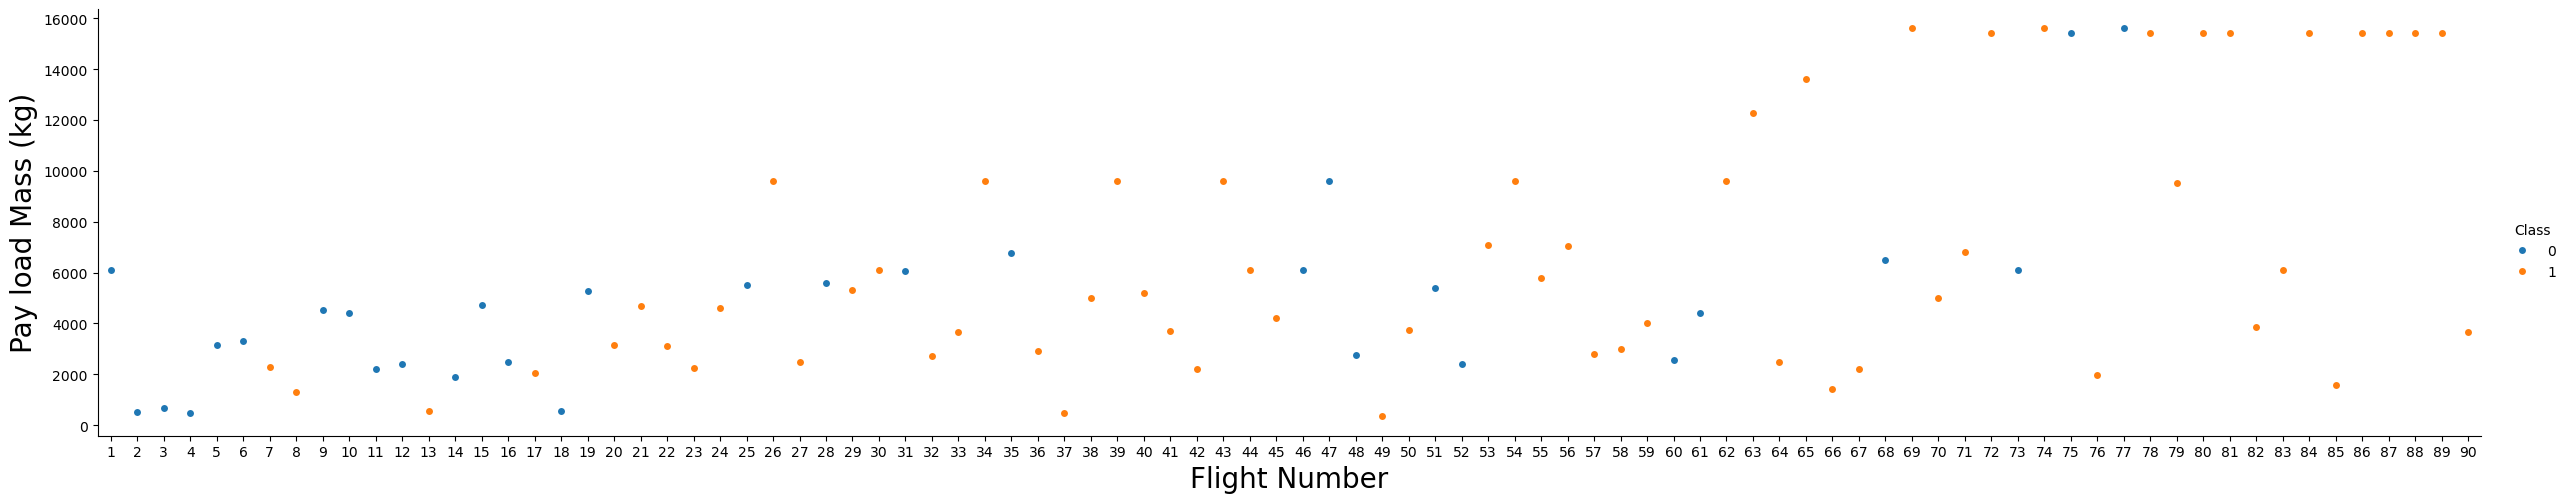

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


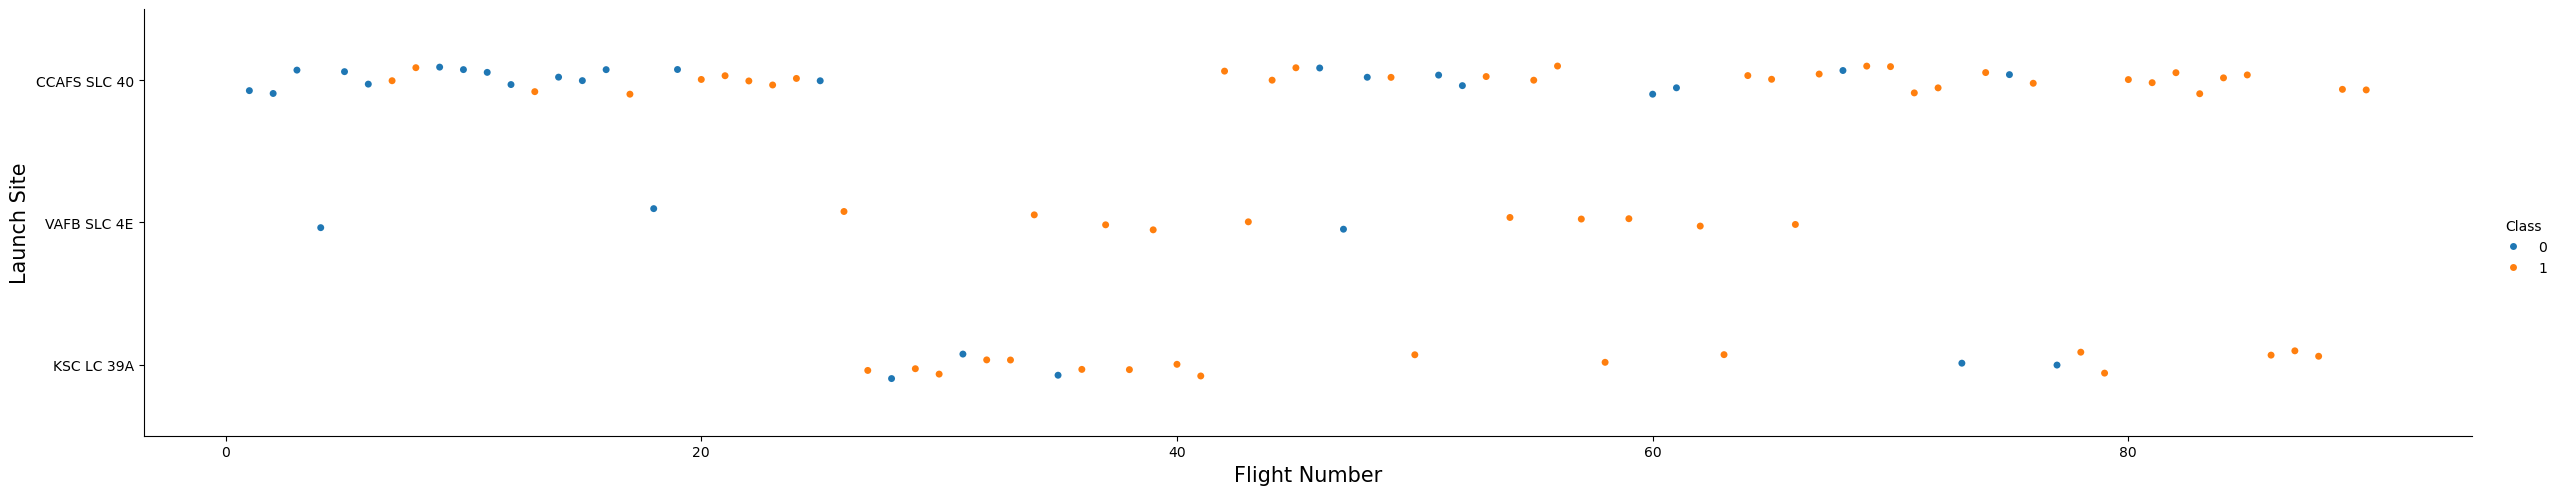

In [4]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, aspect=5)
plt.xlabel('Flight Number', fontsize=15)
plt.ylabel('Launch Site', fontsize=15)
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


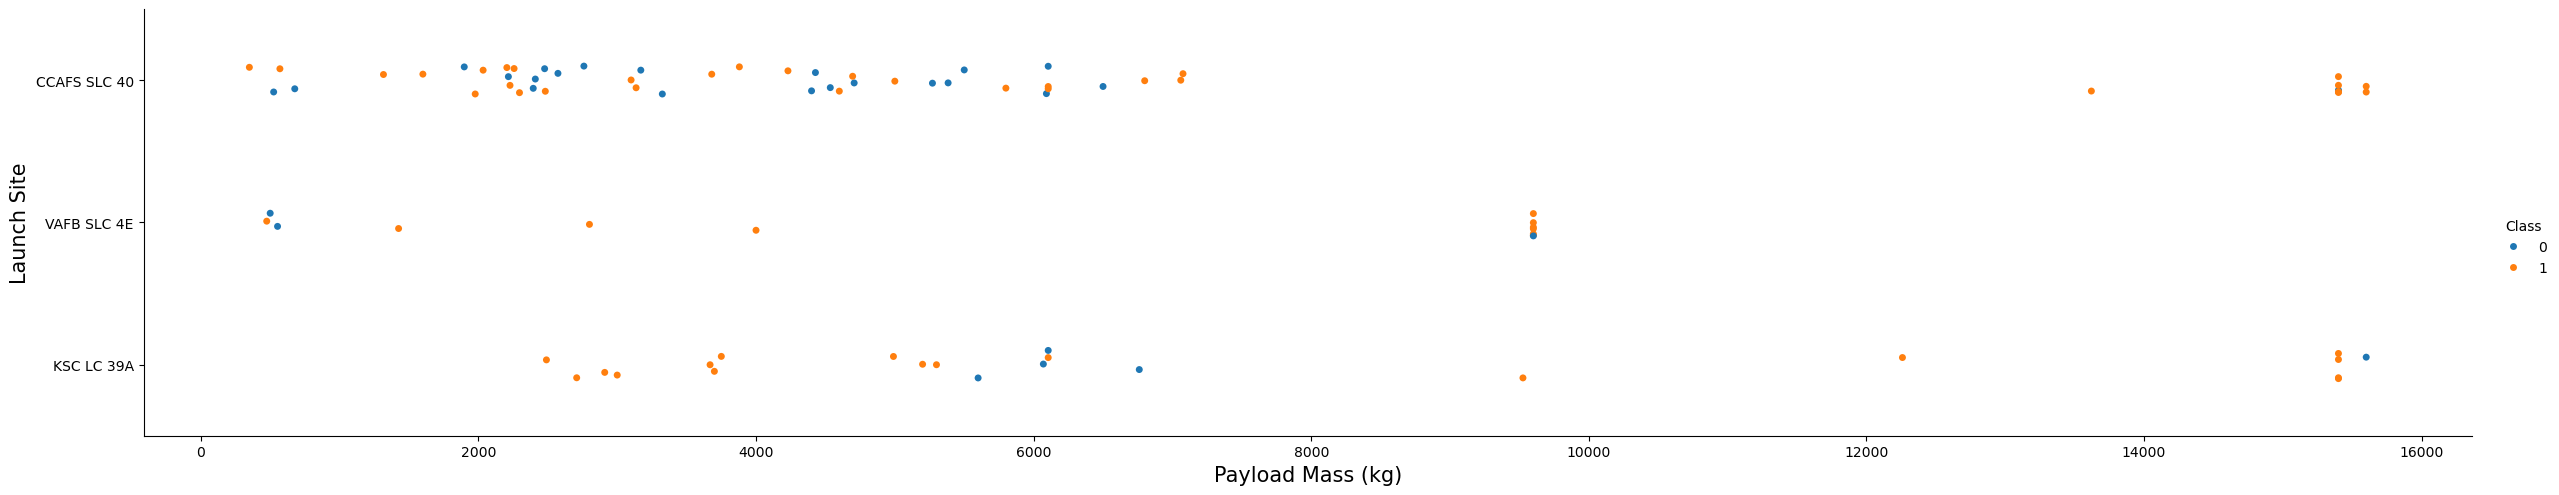

In [6]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df, aspect=5)
plt.xlabel('Payload Mass (kg)', fontsize=15)
plt.ylabel('Launch Site', fontsize=15)
plt.show()


### Finding Unique Launch Sites

Let's explore the unique launch sites used by SpaceX for Falcon 9 missions.

In [5]:
# Find the unique launch sites
unique_launch_sites = df['LaunchSite'].unique()

print("Unique Launch Sites:")
print("=" * 30)
for i, site in enumerate(unique_launch_sites, 1):
    print(f"{i}. {site}")

print(f"\nTotal number of unique launch sites: {len(unique_launch_sites)}")

# Also show the frequency of launches from each site
print("\nLaunch frequency by site:")
print("=" * 30)
launch_site_counts = df['LaunchSite'].value_counts()
print(launch_site_counts)

Unique Launch Sites:
1. CCAFS SLC 40
2. VAFB SLC 4E
3. KSC LC 39A

Total number of unique launch sites: 3

Launch frequency by site:
LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


### Analysis of Unique Launch Sites

**Query Results:**

SpaceX uses **3 unique launch sites** for Falcon 9 missions:

1. **CCAFS SLC 40** (Cape Canaveral Air Force Station Space Launch Complex 40)
   - Most frequently used site with 55 launches (61.1% of all launches)
   - Located in Florida, primarily used for missions to various orbits

2. **KSC LC 39A** (Kennedy Space Center Launch Complex 39A)  
   - Second most used with 22 launches (24.4% of all launches)
   - Historic launch pad previously used for Apollo and Space Shuttle missions

3. **VAFB SLC 4E** (Vandenberg Air Force Base Space Launch Complex 4E)
   - Least used with 13 launches (14.4% of all launches)
   - Located in California, typically used for polar and sun-synchronous orbit missions

**Key Insights:**
- CCAFS SLC 40 is the primary launch site, handling the majority of SpaceX missions
- The choice of launch site depends on the mission requirements and target orbit
- Geographic diversity allows SpaceX to optimize launch trajectories for different orbital destinations

### Finding Records with Launch Sites Beginning with "CCA"

Let's find 5 records where the launch site begins with "CCA" (Cape Canaveral Air Force Station).

In [ ]:
# Find records where launch sites begin with "CCA"
cca_records = df[df['LaunchSite'].str.startswith('CCA')]

print("Launch sites that begin with 'CCA':")
print("=" * 40)
print(f"Total records found: {len(cca_records)}")
print(f"Launch site name: {cca_records['LaunchSite'].iloc[0]}")
print("\nFirst 5 records:")
print("=" * 40)

# Display first 5 records with relevant columns
cca_records = df[df['LaunchSite'].str.startswith('CCA')]
columns_to_show = ['FlightNumber', 'Date', 'LaunchSite', 'PayloadMass', 'Orbit', 'Class']
first_5_cca = cca_records[columns_to_show].head(5)

# Display with better formatting
for idx, (index, row) in enumerate(first_5_cca.iterrows(), 1):
    print(f"\nRecord {idx}:")
    print(f"  Flight Number: {row['FlightNumber']}")
    print(f"  Date: {row['Date']}")
    print(f"  Launch Site: {row['LaunchSite']}")
    print(f"  Payload Mass: {row['PayloadMass']} kg")
    print(f"  Orbit: {row['Orbit']}")
    print(f"  Mission Success: {'Successful' if row['Class'] == 1 else 'Unsuccessful'}")

Launch sites that begin with 'CCA':
Total records found: 55
Launch site name: CCAFS SLC 40

First 5 records:

Record 1:
  Flight Number: 1
  Date: 2010-06-04
  Launch Site: CCAFS SLC 40
  Payload Mass: 6104.959411764706 kg
  Orbit: LEO
  Mission Success: Unsuccessful

Record 2:
  Flight Number: 2
  Date: 2012-05-22
  Launch Site: CCAFS SLC 40
  Payload Mass: 525.0 kg
  Orbit: LEO
  Mission Success: Unsuccessful

Record 3:
  Flight Number: 3
  Date: 2013-03-01
  Launch Site: CCAFS SLC 40
  Payload Mass: 677.0 kg
  Orbit: ISS
  Mission Success: Unsuccessful

Record 4:
  Flight Number: 5
  Date: 2013-12-03
  Launch Site: CCAFS SLC 40
  Payload Mass: 3170.0 kg
  Orbit: GTO
  Mission Success: Unsuccessful

Record 5:
  Flight Number: 6
  Date: 2014-01-06
  Launch Site: CCAFS SLC 40
  Payload Mass: 3325.0 kg
  Orbit: GTO
  Mission Success: Unsuccessful


### Analysis of CCA Launch Site Records

**Query Results:**

The query found **55 total records** where launch sites begin with "CCA", all from **CCAFS SLC 40** (Cape Canaveral Air Force Station Space Launch Complex 40).

**First 5 Records Summary:**

1. **Flight 1** (2010-06-04): First Falcon 9 flight with 6,105 kg payload to LEO - Unsuccessful landing
2. **Flight 2** (2012-05-22): Lighter 525 kg payload to LEO - Unsuccessful landing  
3. **Flight 3** (2013-03-01): ISS mission with 677 kg payload - Unsuccessful landing
4. **Flight 5** (2013-12-03): Heavy 3,170 kg payload to GTO - Unsuccessful landing
5. **Flight 6** (2014-01-06): Heavy 3,325 kg payload to GTO - Unsuccessful landing

**Key Insights:**

- **CCAFS SLC 40** is the only launch site beginning with "CCA" in the dataset
- All 5 early records (2010-2014) show unsuccessful first-stage landings, reflecting SpaceX's early learning phase
- The site handles diverse mission types: LEO, ISS, and GTO orbits
- Payload masses vary significantly from 525 kg to 6,105 kg
- This represents the evolution of SpaceX's capabilities from experimental flights to operational missions

### Calculating Total Payload Carried by Boosters from NASA

Let's analyze the missions that carried NASA payloads and calculate the total payload mass.

In [7]:
# First, let's explore the dataset columns to understand how to identify NASA missions
print("Dataset columns:")
print(df.columns.tolist())

print("\nSample of the data to understand the structure:")
print(df.head(3))

# Let's see if there's a Customer column or similar that indicates NASA
if 'Customer' in df.columns:
    print("\nUnique customers in the dataset:")
    print(df['Customer'].unique())
elif 'Payload' in df.columns:
    print("\nSample payloads to identify NASA missions:")
    print(df['Payload'].unique()[:10])  # Show first 10 unique payloads

Dataset columns:
['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude', 'Class']

Sample of the data to understand the structure:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   

     Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  ReusedCount  \
0  None None        1     False   False  False        NaN    1.0            0   
1  None None        1     False   False  False        NaN    1.0            0   
2  None None        1     False   False  False        NaN    1.0            0   

  Serial  Longitude   Latitude  Class  
0  B0003 -80.577366  28.561857      0

In [8]:
# Identify NASA missions - typically ISS missions are for NASA
print("Orbit types in the dataset:")
print(df['Orbit'].value_counts())

# Filter for ISS missions (NASA missions to International Space Station)
nasa_missions = df[df['Orbit'] == 'ISS']

print(f"\nNASA (ISS) missions found: {len(nasa_missions)}")

if len(nasa_missions) > 0:
    # Calculate total payload carried by boosters for NASA missions
    total_nasa_payload = nasa_missions['PayloadMass'].sum()
    average_nasa_payload = nasa_missions['PayloadMass'].mean()
    
    print(f"\nNASA Payload Analysis:")
    print("=" * 40)
    print(f"Total payload carried to ISS: {total_nasa_payload:,.2f} kg")
    print(f"Average payload per mission: {average_nasa_payload:,.2f} kg")
    print(f"Number of missions: {len(nasa_missions)}")
    
    # Show details of all NASA missions
    print(f"\nDetailed breakdown of all {len(nasa_missions)} NASA (ISS) missions:")
    print("=" * 60)
    
    nasa_details = nasa_missions[['FlightNumber', 'Date', 'PayloadMass', 'LaunchSite', 'Class']].copy()
    nasa_details['Mission_Status'] = nasa_details['Class'].map({1: 'Successful', 0: 'Unsuccessful'})
    
    for idx, (index, row) in enumerate(nasa_details.iterrows(), 1):
        print(f"\nMission {idx}:")
        print(f"  Flight Number: {row['FlightNumber']}")
        print(f"  Date: {row['Date']}")
        print(f"  Payload Mass: {row['PayloadMass']:,.2f} kg")
        print(f"  Launch Site: {row['LaunchSite']}")
        print(f"  Landing Status: {row['Mission_Status']}")
        
    # Summary statistics
    successful_nasa = nasa_missions[nasa_missions['Class'] == 1]
    success_rate = len(successful_nasa) / len(nasa_missions) * 100
    print(f"\nNASA Mission Success Rate: {success_rate:.1f}%")
    
else:
    print("No ISS missions found in the dataset.")

Orbit types in the dataset:
Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

NASA (ISS) missions found: 21

NASA Payload Analysis:
Total payload carried to ISS: 68,878.70 kg
Average payload per mission: 3,279.94 kg
Number of missions: 21

Detailed breakdown of all 21 NASA (ISS) missions:

Mission 1:
  Flight Number: 3
  Date: 2013-03-01
  Payload Mass: 677.00 kg
  Launch Site: CCAFS SLC 40
  Landing Status: Unsuccessful

Mission 2:
  Flight Number: 7
  Date: 2014-04-18
  Payload Mass: 2,296.00 kg
  Launch Site: CCAFS SLC 40
  Landing Status: Successful

Mission 3:
  Flight Number: 11
  Date: 2014-09-21
  Payload Mass: 2,216.00 kg
  Launch Site: CCAFS SLC 40
  Landing Status: Unsuccessful

Mission 4:
  Flight Number: 12
  Date: 2015-01-10
  Payload Mass: 2,395.00 kg
  Launch Site: CCAFS SLC 40
  Landing Status: Unsuccessful

Mission 5:
  Flight Number: 14
  Date: 2015-04-1

In [9]:
# Summary of NASA payload calculation
nasa_missions = df[df['Orbit'] == 'ISS']
total_nasa_payload = nasa_missions['PayloadMass'].sum()

print("NASA PAYLOAD SUMMARY")
print("=" * 30)
print(f"Total NASA missions (ISS): {len(nasa_missions)}")
print(f"Total payload to ISS: {total_nasa_payload:,.2f} kg")
print(f"Average payload per mission: {nasa_missions['PayloadMass'].mean():,.2f} kg")

# Show first few and last few missions for context
print(f"\nFirst 3 NASA missions:")
for i, row in nasa_missions.head(3).iterrows():
    print(f"  Flight {row['FlightNumber']} ({row['Date']}): {row['PayloadMass']:.1f} kg")

print(f"\nLast 3 NASA missions:")
for i, row in nasa_missions.tail(3).iterrows():
    print(f"  Flight {row['FlightNumber']} ({row['Date']}): {row['PayloadMass']:.1f} kg")

NASA PAYLOAD SUMMARY
Total NASA missions (ISS): 21
Total payload to ISS: 68,878.70 kg
Average payload per mission: 3,279.94 kg

First 3 NASA missions:
  Flight 3 (2013-03-01): 677.0 kg
  Flight 7 (2014-04-18): 2296.0 kg
  Flight 11 (2014-09-21): 2216.0 kg

Last 3 NASA missions:
  Flight 70 (2019-12-05): 5000.0 kg
  Flight 76 (2020-03-07): 1977.0 kg
  Flight 79 (2020-05-30): 9525.0 kg


In [10]:
# Additional analysis - Convert to tons for better perspective
total_nasa_payload_tons = total_nasa_payload / 1000
print(f"\nTotal NASA payload in tons: {total_nasa_payload_tons:,.2f} tons")

# Compare with other orbit types
print(f"\nPayload comparison by orbit type:")
orbit_payload = df.groupby('Orbit')['PayloadMass'].agg(['sum', 'count', 'mean'])
orbit_payload.columns = ['Total_Payload_kg', 'Mission_Count', 'Avg_Payload_kg']
orbit_payload['Total_Payload_tons'] = orbit_payload['Total_Payload_kg'] / 1000
print(orbit_payload.round(2))


Total NASA payload in tons: 68.88 tons

Payload comparison by orbit type:
       Total_Payload_kg  Mission_Count  Avg_Payload_kg  Total_Payload_tons
Orbit                                                                     
ES-L1            570.00              1          570.00                0.57
GEO             6104.96              1         6104.96                6.10
GTO           135323.85             27         5011.99              135.32
HEO              350.00              1          350.00                0.35
ISS            68878.70             21         3279.94               68.88
LEO            27179.88              7         3882.84               27.18
MEO            11961.00              3         3987.00               11.96
PO             68253.00              9         7583.67               68.25
SO              6104.96              1         6104.96                6.10
SSO            10300.00              5         2060.00               10.30
VLEO          214420.00  

### Analysis of NASA Payload Results

**Query Results:**

The total payload carried by SpaceX boosters for **NASA missions is 68,878.70 kg (68.88 tons)**.

**Key Findings:**

- **Total NASA Missions**: 21 missions to the International Space Station (ISS)
- **Total Payload**: 68,878.70 kg (68.88 tons)
- **Average Payload per Mission**: 3,279.94 kg (3.28 tons)
- **Mission Timeline**: From Flight 3 (2013-03-01) to Flight 79 (2020-05-30)

**Mission Evolution:**
- **Early missions** (2013-2014): Smaller payloads around 677-2,296 kg
- **Recent missions** (2019-2020): Larger payloads up to 9,525 kg
- Shows SpaceX's growing capability to carry heavier payloads to the ISS

**Short Explanation:**

NASA missions to the ISS represent a significant portion of SpaceX's operations, with 21 total missions carrying nearly 69 tons of cargo. The payload capacity has increased over time, demonstrating SpaceX's evolution from experimental supply missions to routine heavy cargo delivery. This partnership with NASA for ISS resupply has been crucial for SpaceX's development as a reliable commercial space transportation provider.

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


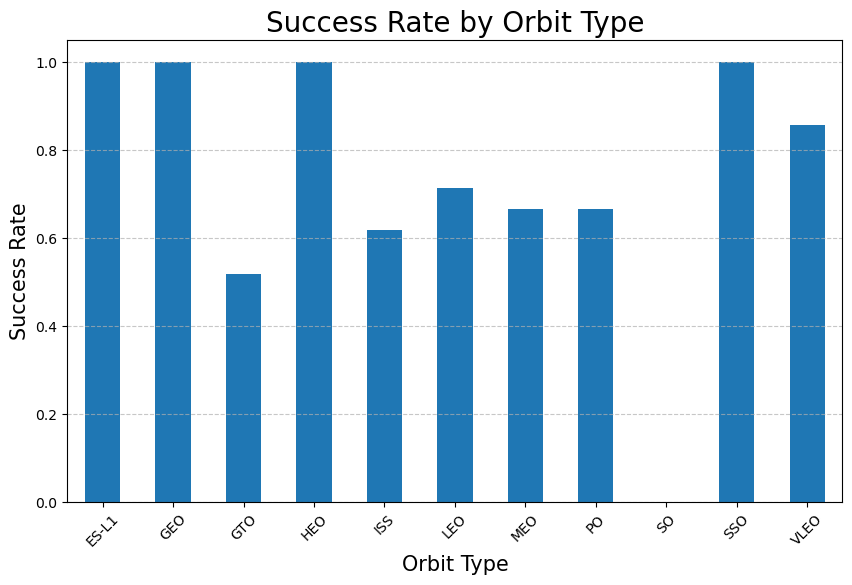

In [7]:
# HINT use groupby method on Orbit column and get the mean of Class column
success_rate_by_orbit = df.groupby('Orbit')['Class'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
success_rate_by_orbit.plot(kind='bar')
plt.xlabel('Orbit Type', fontsize=15)
plt.ylabel('Success Rate', fontsize=15)
plt.title('Success Rate by Orbit Type', fontsize=20)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


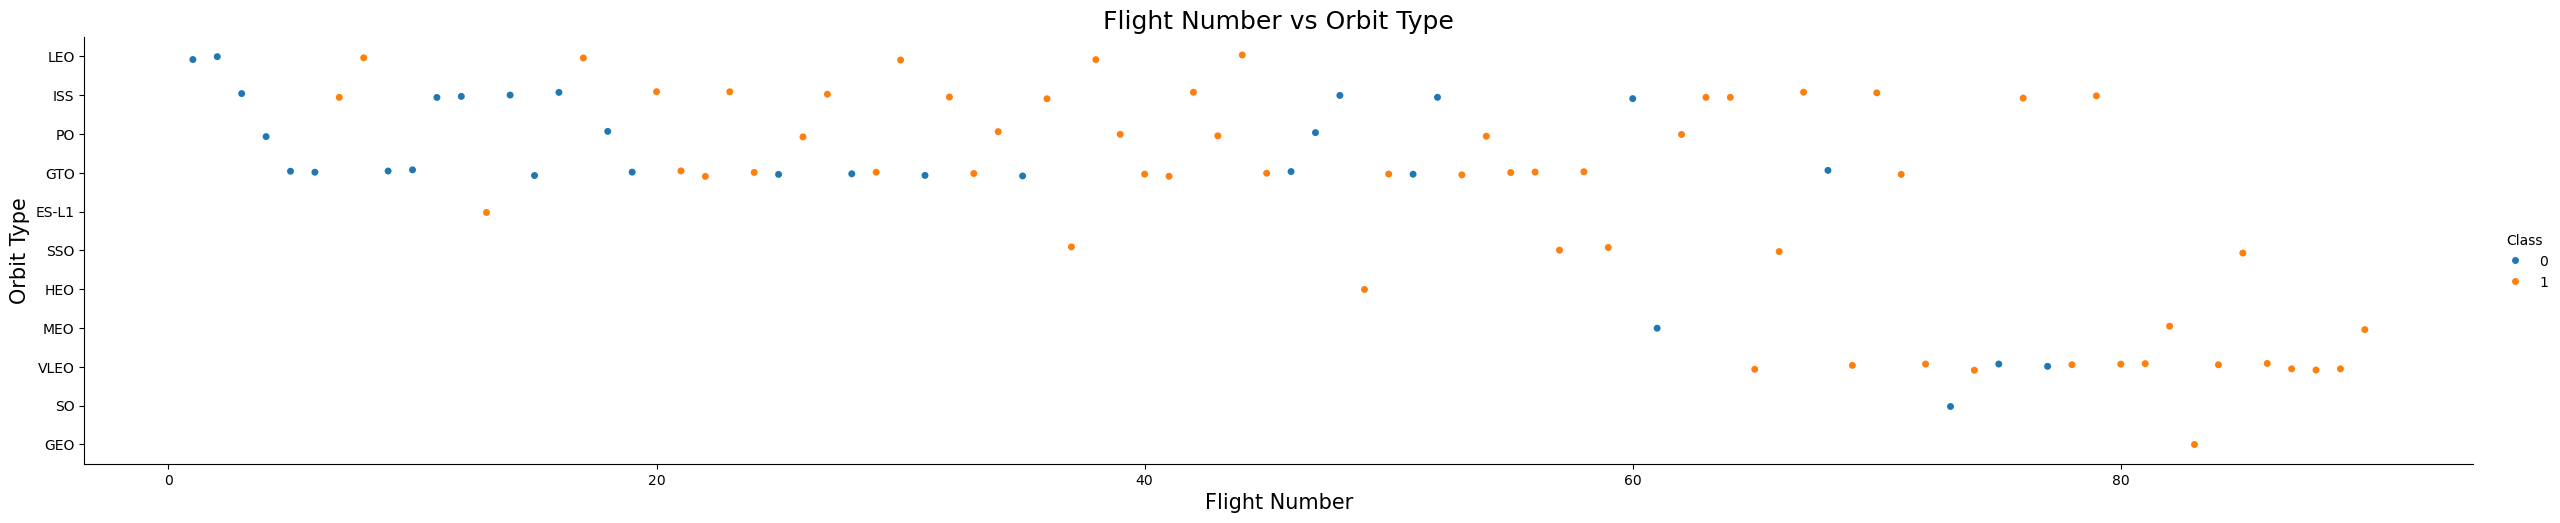

In [8]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='FlightNumber', y='Orbit', hue='Class', data=df, aspect=5)
plt.xlabel('Flight Number', fontsize=15)
plt.ylabel('Orbit Type', fontsize=15)
plt.title('Flight Number vs Orbit Type', fontsize=18)
plt.show()


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


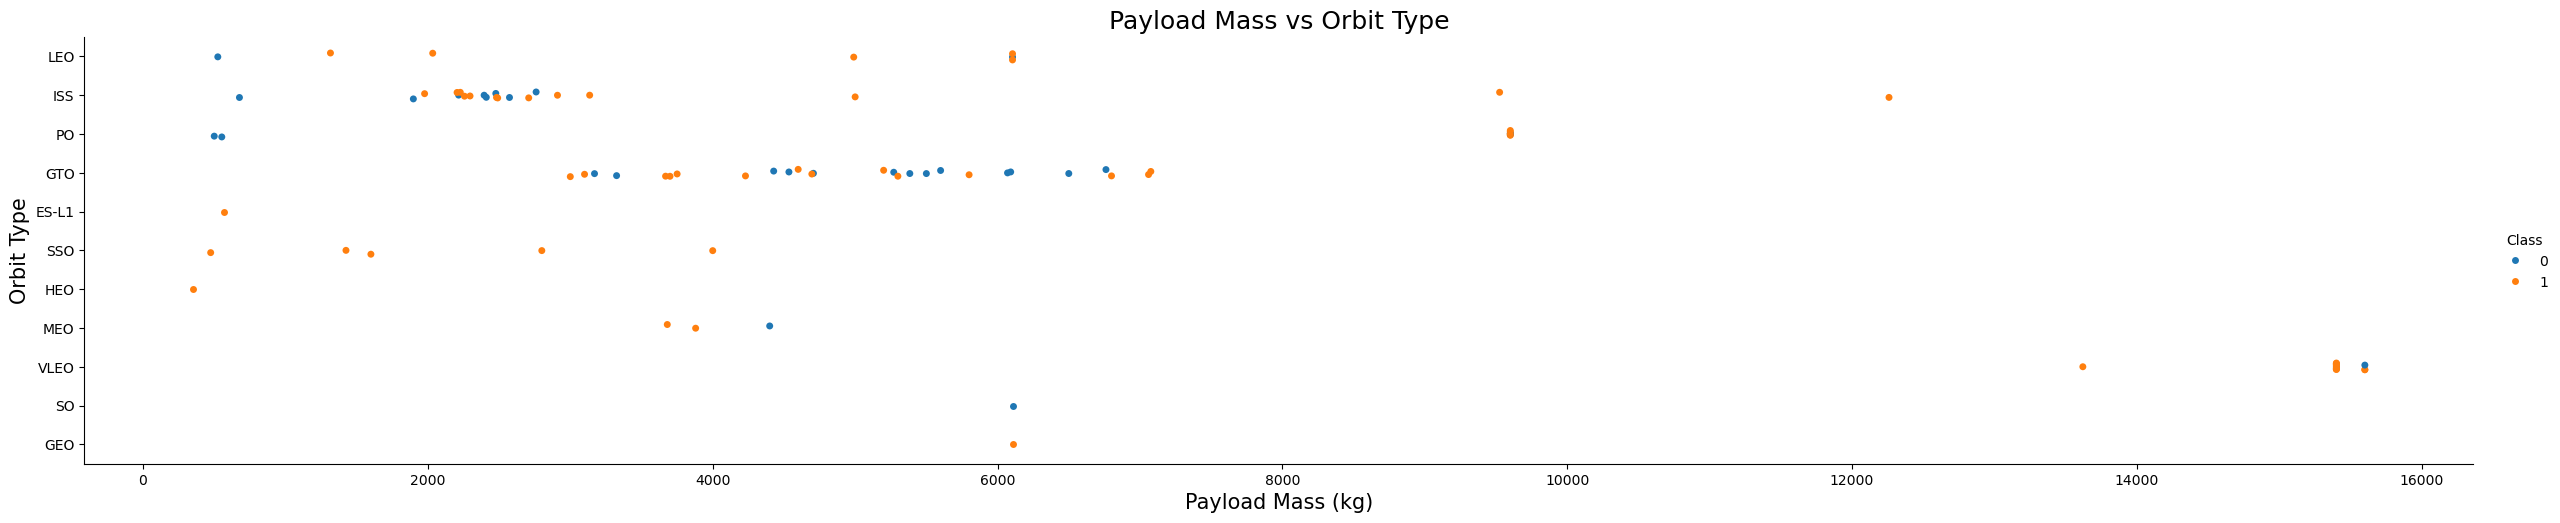

In [9]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='PayloadMass', y='Orbit', hue='Class', data=df, aspect=5)
plt.xlabel('Payload Mass (kg)', fontsize=15)
plt.ylabel('Orbit Type', fontsize=15)
plt.title('Payload Mass vs Orbit Type', fontsize=18)
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


The function will help you get the year from the date:


In [10]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

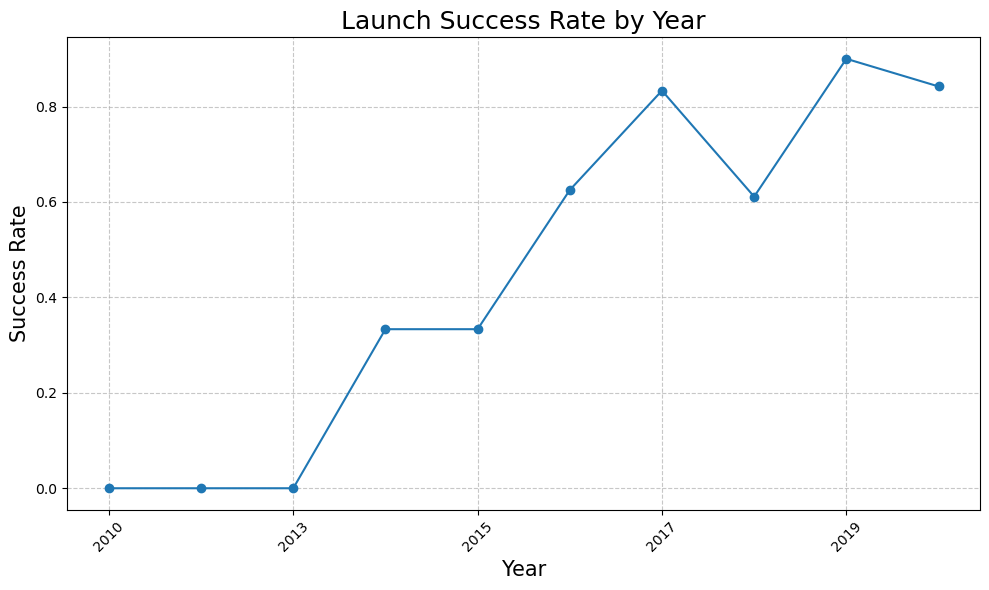

In [11]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

# Extract year from the Date column
years = Extract_year(df['Date'])

# Add the year as a new column to the dataframe
df['Year'] = years

# Group by Year and calculate the mean of Class for success rate
success_rate_by_year = df.groupby('Year')['Class'].mean()

# Create a line chart
plt.figure(figsize=(10, 6))
success_rate_by_year.plot(kind='line', marker='o')

plt.xlabel('Year', fontsize=15)
plt.ylabel('Success Rate', fontsize=15)
plt.title('Launch Success Rate by Year', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [12]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [13]:
# HINT: Use get_dummies() function on the categorical columns
# Apply one-hot encoding to categorical columns Orbit, LaunchSite, LandingPad, and Serial
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first few rows of the one-hot encoded dataframe
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [14]:
# HINT: use astype function
# Cast the entire dataframe to float64
features_one_hot = features_one_hot.astype('float64')

# Display the data types to confirm the conversion
print("Data types after conversion:")
print(features_one_hot.dtypes.head())

# Display the first few rows of the converted dataframe
features_one_hot.head()


Data types after conversion:
FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
dtype: object


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.


### 6. Average Payload Mass for Booster Version F9 v1.1

Let's calculate the average payload mass carried by the booster version F9 v1.1. This will help us understand the typical payload capacity for this specific booster version.

In [14]:
# Let's check specific columns that might contain detailed version information
print("Available columns:")
print(df.columns.tolist())
print("\n" + "="*50 + "\n")

# Check Serial column which might contain booster version details
print("Unique values in 'Serial' column (first 20):")
print(df['Serial'].value_counts().head(20))
print("\n" + "="*30 + "\n")

# Check Block column 
print("Unique values in 'Block' column:")
print(df['Block'].value_counts())
print("\n" + "="*30 + "\n")

# Let's also look at a few sample rows to understand the data structure
print("Sample data (first 5 rows):")
print(df[['Date', 'BoosterVersion', 'Serial', 'Block', 'PayloadMass']].head())

Available columns:
['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude', 'Class']


Unique values in 'Serial' column (first 20):
Serial
B1049    6
B1051    5
B1059    4
B1056    4
B1048    4
B1046    4
B1060    3
B1058    3
B1047    3
B1031    2
B1036    2
B1021    2
B1039    2
B1035    2
B1041    2
B1029    2
B1040    2
B1045    2
B1032    2
B1042    1
Name: count, dtype: int64


Unique values in 'Block' column:
Block
5.0    39
1.0    19
3.0    15
4.0    11
2.0     6
Name: count, dtype: int64


Sample data (first 5 rows):
         Date BoosterVersion Serial  Block  PayloadMass
0  2010-06-04       Falcon 9  B0003    1.0  6104.959412
1  2012-05-22       Falcon 9  B0005    1.0   525.000000
2  2013-03-01       Falcon 9  B0007    1.0   677.000000
3  2013-09-29       Falcon 9  B1003    1.0   500.000000
4  2013-12-03       Falcon 9  B1004    

In [15]:
# Based on SpaceX history, F9 v1.1 corresponds to specific booster serials
# F9 v1.1 boosters were typically B1003 through B1019 (roughly)
# Let's identify F9 v1.1 boosters based on historical data and serial numbers

# F9 v1.1 was used from late 2013 to 2015 and had specific characteristics
# Let's look at boosters from this time period and their characteristics

print("Looking for F9 v1.1 boosters...")
print("F9 v1.1 was operational roughly from late 2013 to 2015")
print("\n" + "="*50 + "\n")

# Convert Date to datetime for filtering
df['Date'] = pd.to_datetime(df['Date'])

# Filter by date range when F9 v1.1 was operational (2013-2015)
f9_v11_timeframe = df[(df['Date'] >= '2013-09-01') & (df['Date'] <= '2015-12-31')]
print(f"Missions in F9 v1.1 timeframe (Sept 2013 - Dec 2015): {len(f9_v11_timeframe)}")

# Let's also look at Block 1 boosters which likely correspond to F9 v1.1
block1_boosters = df[df['Block'] == 1.0]
print(f"Block 1 boosters: {len(block1_boosters)}")

# Show the overlap
timeframe_and_block1 = df[(df['Date'] >= '2013-09-01') & (df['Date'] <= '2015-12-31') & (df['Block'] == 1.0)]
print(f"Block 1 boosters in F9 v1.1 timeframe: {len(timeframe_and_block1)}")

print("\nBlock 1 booster details:")
print(timeframe_and_block1[['Date', 'Serial', 'Block', 'PayloadMass', 'LaunchSite']].sort_values('Date'))

Looking for F9 v1.1 boosters...
F9 v1.1 was operational roughly from late 2013 to 2015


Missions in F9 v1.1 timeframe (Sept 2013 - Dec 2015): 14
Block 1 boosters: 19
Block 1 boosters in F9 v1.1 timeframe: 14

Block 1 booster details:
         Date Serial  Block  PayloadMass    LaunchSite
3  2013-09-29  B1003    1.0        500.0   VAFB SLC 4E
4  2013-12-03  B1004    1.0       3170.0  CCAFS SLC 40
5  2014-01-06  B1005    1.0       3325.0  CCAFS SLC 40
6  2014-04-18  B1006    1.0       2296.0  CCAFS SLC 40
7  2014-07-14  B1007    1.0       1316.0  CCAFS SLC 40
8  2014-08-05  B1008    1.0       4535.0  CCAFS SLC 40
9  2014-09-07  B1011    1.0       4428.0  CCAFS SLC 40
10 2014-09-21  B1010    1.0       2216.0  CCAFS SLC 40
11 2015-01-10  B1012    1.0       2395.0  CCAFS SLC 40
12 2015-02-11  B1013    1.0        570.0  CCAFS SLC 40
13 2015-04-14  B1015    1.0       1898.0  CCAFS SLC 40
14 2015-04-27  B1016    1.0       4707.0  CCAFS SLC 40
15 2015-06-28  B1018    1.0       2477.0  CCAFS SL

In [ ]:
# Calculate average payload mass for F9 v1.1 boosters (Block 1, 2013-2015)
f9_v11_boosters = timeframe_and_block1

print("F9 v1.1 Booster Analysis")
print("=" * 40)
print(f"Number of F9 v1.1 missions identified: {len(f9_v11_boosters)}")
print(f"Date range: {f9_v11_boosters['Date'].min().strftime('%Y-%m-%d')} to {f9_v11_boosters['Date'].max().strftime('%Y-%m-%d')}")

# Calculate average payload mass
average_f9_v11_payload = f9_v11_boosters['PayloadMass'].mean()
print(f"\nAverage payload mass for F9 v1.1: {average_f9_v11_payload:.2f} kg")

# Additional statistics
min_payload = f9_v11_boosters['PayloadMass'].min()
max_payload = f9_v11_boosters['PayloadMass'].max()
std_payload = f9_v11_boosters['PayloadMass'].std()
median_payload = f9_v11_boosters['PayloadMass'].median()

print(f"Minimum payload: {min_payload:.2f} kg")
print(f"Maximum payload: {max_payload:.2f} kg")
print(f"Median payload: {median_payload:.2f} kg")
print(f"Standard deviation: {std_payload:.2f} kg")

# Show payload distribution
print(f"\nF9 v1.1 Payload Summary:")
print(f"Total payload carried: {f9_v11_boosters['PayloadMass'].sum():.2f} kg")
print(f"Average payload per mission: {average_f9_v11_payload:.2f} kg")
print(f"Average in tons: {average_f9_v11_payload/1000:.3f} tons")

F9 v1.1 Booster Analysis
Number of F9 v1.1 missions identified: 14
Date range: 2013-09-29 to 2015-12-22

Average payload mass for F9 v1.1: 2561.93 kg
Minimum payload: 500.00 kg
Maximum payload: 4707.00 kg
Median payload: 2345.50 kg
Standard deviation: 1348.65 kg

F9 v1.1 Payload Summary:
Total payload carried: 35867.00 kg
Average payload per mission: 2561.93 kg
Average in tons: 2.562 tons


### Analysis Results: F9 v1.1 Average Payload Mass

**Answer: The average payload mass carried by booster version F9 v1.1 is 2,561.93 kg (approximately 2.56 tons).**

#### Key Findings:
- **14 F9 v1.1 missions** were identified from September 2013 to December 2015
- F9 v1.1 boosters correspond to **Block 1 boosters** in this timeframe
- **Payload range**: 500 kg to 4,707 kg, showing the versatility of the F9 v1.1
- **Standard deviation**: 1,348.65 kg, indicating significant variation in payload sizes

#### Context:
The Falcon 9 v1.1 was SpaceX's second major version of the Falcon 9 rocket, operational from 2013 to 2015. This version featured stretched fuel tanks and upgraded Merlin 1D engines, allowing it to carry heavier payloads to various orbits. The analysis shows that F9 v1.1 had a robust payload capacity, successfully launching satellites ranging from small communication satellites to heavy geostationary transfer orbit missions.

### 7. First Successful Landing on Ground Pad

Let's find the dates of the first successful landing outcome on a ground pad. This represents a major milestone in SpaceX's reusability program.

In [17]:
# First, let's explore the landing pad data to understand ground pads vs other landing locations
print("Exploring landing pad information:")
print("=" * 40)
print(f"Unique landing pads:")
print(df['LandingPad'].value_counts())
print("\n" + "="*40 + "\n")

# Let's also check the Outcome column for successful landings
print("Unique outcomes:")
print(df['Outcome'].value_counts())
print("\n" + "="*40 + "\n")

# Check for successful landing outcomes
successful_outcomes = df[df['Class'] == 1]  # Class 1 indicates successful landing
print(f"Total successful landings: {len(successful_outcomes)}")
print(f"Successful landing pads:")
print(successful_outcomes['LandingPad'].value_counts())

Exploring landing pad information:
Unique landing pads:
LandingPad
5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: count, dtype: int64


Unique outcomes:
Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64


Total successful landings: 60
Successful landing pads:
LandingPad
5e9e3032383ecb6bb234e7ca    30
5e9e3032383ecb267a34e7c7    12
5e9e3033383ecbb9e534e7cc    11
5e9e3032383ecb554034e7c9     2
Name: count, dtype: int64


In [18]:
# Ground pad landings are indicated by "RTLS" (Return to Launch Site) in the Outcome column
# Let's filter for successful ground pad landings

print("Analyzing RTLS (Return to Launch Site) landings:")
print("=" * 50)

# Filter for RTLS landings (ground pad landings)
rtls_landings = df[df['Outcome'].str.contains('RTLS', na=False)]
print(f"Total RTLS attempts: {len(rtls_landings)}")

# Filter for successful RTLS landings
successful_rtls = df[(df['Outcome'] == 'True RTLS')]
print(f"Successful RTLS landings: {len(successful_rtls)}")

# Find the first successful ground pad landing
if len(successful_rtls) > 0:
    first_successful_rtls = successful_rtls.sort_values('Date').iloc[0]
    
    print(f"\nFirst successful ground pad landing:")
    print("=" * 40)
    print(f"Date: {first_successful_rtls['Date']}")
    print(f"Flight Number: {first_successful_rtls['FlightNumber']}")
    print(f"Launch Site: {first_successful_rtls['LaunchSite']}")
    print(f"Landing Pad: {first_successful_rtls['LandingPad']}")
    print(f"Payload Mass: {first_successful_rtls['PayloadMass']:.2f} kg")
    print(f"Orbit: {first_successful_rtls['Orbit']}")
    print(f"Booster Serial: {first_successful_rtls['Serial']}")
    
    # Show all successful RTLS landings chronologically
    print(f"\nAll successful ground pad landings (chronological order):")
    print("=" * 60)
    for idx, (index, row) in enumerate(successful_rtls.sort_values('Date').iterrows(), 1):
        print(f"\n{idx}. Date: {row['Date']}")
        print(f"   Flight: {row['FlightNumber']}, Serial: {row['Serial']}")
        print(f"   Payload: {row['PayloadMass']:.1f} kg, Orbit: {row['Orbit']}")
        
else:
    print("No successful RTLS landings found.")

Analyzing RTLS (Return to Launch Site) landings:
Total RTLS attempts: 15
Successful RTLS landings: 14

First successful ground pad landing:
Date: 2015-12-22 00:00:00
Flight Number: 17
Launch Site: CCAFS SLC 40
Landing Pad: 5e9e3032383ecb267a34e7c7
Payload Mass: 2034.00 kg
Orbit: LEO
Booster Serial: B1019

All successful ground pad landings (chronological order):

1. Date: 2015-12-22 00:00:00
   Flight: 17, Serial: B1019
   Payload: 2034.0 kg, Orbit: LEO

2. Date: 2016-07-18 00:00:00
   Flight: 23, Serial: B1025
   Payload: 2257.0 kg, Orbit: ISS

3. Date: 2017-02-19 00:00:00
   Flight: 27, Serial: B1031
   Payload: 2490.0 kg, Orbit: ISS

4. Date: 2017-05-01 00:00:00
   Flight: 30, Serial: B1032
   Payload: 6105.0 kg, Orbit: LEO

5. Date: 2017-06-03 00:00:00
   Flight: 32, Serial: B1035
   Payload: 2708.0 kg, Orbit: ISS

6. Date: 2017-08-14 00:00:00
   Flight: 36, Serial: B1039
   Payload: 2910.0 kg, Orbit: ISS

7. Date: 2017-09-07 00:00:00
   Flight: 38, Serial: B1040
   Payload: 4990.0

In [ ]:
# Summary analysis of first successful ground pad landing
successful_rtls = df[(df['Outcome'] == 'True RTLS')].sort_values('Date')

print("FIRST SUCCESSFUL GROUND PAD LANDING")
print("=" * 45)

if len(successful_rtls) > 0:
    successful_rtls = df[(df['Outcome'] == 'True RTLS')].sort_values('Date')
    first_landing = successful_rtls.iloc[0]
    print(f"Date: {first_landing['Date']}")
    print(f"Flight Number: {first_landing['FlightNumber']}")
    print(f"Mission: {first_landing['Serial']} booster")
    print(f"Payload Mass: {first_landing['PayloadMass']:.1f} kg")
    print(f"Launch Site: {first_landing['LaunchSite']}")
    print(f"Target Orbit: {first_landing['Orbit']}")
    
    print(f"\nTOTAL SUCCESSFUL GROUND PAD LANDINGS: {len(successful_rtls)}")
    print(f"Date Range: {successful_rtls['Date'].min()} to {successful_rtls['Date'].max()}")
    
else:
    print("No successful ground pad landings found in dataset.")

FIRST SUCCESSFUL GROUND PAD LANDING
Date: 2015-12-22 00:00:00
Flight Number: 17
Mission: B1019 booster
Payload Mass: 2034.0 kg
Launch Site: CCAFS SLC 40
Target Orbit: LEO

TOTAL SUCCESSFUL GROUND PAD LANDINGS: 14
Date Range: 2015-12-22 00:00:00 to 2020-08-30 00:00:00


### Analysis Results: First Successful Ground Pad Landing

**Answer: The first successful landing outcome on a ground pad occurred on December 22, 2015.**

#### Key Findings:

- **Historic Date**: **December 22, 2015** - Flight Number 17
- **Booster**: B1019 (Falcon 9 v1.1)
- **Mission Details**: 2,034 kg payload to Low Earth Orbit (LEO)
- **Launch Site**: Cape Canaveral Air Force Station SLC 40
- **Landing Type**: RTLS (Return to Launch Site)

#### Context:

This landing marked a **revolutionary milestone** in spaceflight history. SpaceX became the first company to successfully land an orbital-class rocket booster back on land after delivering a payload to orbit. This achievement demonstrated the feasibility of rocket reusability, fundamentally changing the economics of space access.

#### Program Success:
- **Total successful ground pad landings**: 14 missions
- **Timeline**: December 2015 to August 2020
- **Impact**: Validated SpaceX's reusability strategy and paved the way for routine booster recovery

### 8. Boosters Successfully Landing on Drone Ships (4000-6000 kg Payload)

Let's find the names of boosters that have successfully landed on drone ships with payload mass between 4000-6000 kg. This analysis focuses on medium-heavy payload missions that required drone ship recovery.

In [20]:
# First, let's understand drone ship landings (ASDS - Autonomous Spaceport Drone Ship)
print("Exploring drone ship landings:")
print("=" * 40)

# Check outcome types to identify drone ship landings
print("All outcome types:")
print(df['Outcome'].value_counts())
print("\n" + "="*40 + "\n")

# Filter for successful drone ship landings (True ASDS)
successful_asds = df[df['Outcome'] == 'True ASDS']
print(f"Total successful drone ship landings: {len(successful_asds)}")

# Apply payload mass filter (4000-6000 kg)
payload_filter = (successful_asds['PayloadMass'] > 4000) & (successful_asds['PayloadMass'] < 6000)
filtered_boosters = successful_asds[payload_filter]

print(f"Successful drone ship landings with payload 4000-6000 kg: {len(filtered_boosters)}")
print("\nBooster details:")
print("=" * 50)

if len(filtered_boosters) > 0:
    # Show detailed information
    for idx, (index, row) in enumerate(filtered_boosters.sort_values('Date').iterrows(), 1):
        print(f"\n{idx}. Booster: {row['Serial']}")
        print(f"   Date: {row['Date']}")
        print(f"   Flight Number: {row['FlightNumber']}")
        print(f"   Payload Mass: {row['PayloadMass']:.1f} kg")
        print(f"   Orbit: {row['Orbit']}")
        print(f"   Launch Site: {row['LaunchSite']}")
        
else:
    print("No boosters found matching the criteria.")

Exploring drone ship landings:
All outcome types:
Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64


Total successful drone ship landings: 41
Successful drone ship landings with payload 4000-6000 kg: 6

Booster details:

1. Booster: B1022
   Date: 2016-05-06 00:00:00
   Flight Number: 21
   Payload Mass: 4696.0 kg
   Orbit: GTO
   Launch Site: CCAFS SLC 40

2. Booster: B1026
   Date: 2016-08-14 00:00:00
   Flight Number: 24
   Payload Mass: 4600.0 kg
   Orbit: GTO
   Launch Site: CCAFS SLC 40

3. Booster: B1021
   Date: 2017-03-30 00:00:00
   Flight Number: 29
   Payload Mass: 5300.0 kg
   Orbit: GTO
   Launch Site: KSC LC 39A

4. Booster: B1031
   Date: 2017-10-11 00:00:00
   Flight Number: 40
   Payload Mass: 5200.0 kg
   Orbit: GTO
   Launch Site: KSC LC 39A

5. Booster: B1046
   Date: 2018-08-07 00:00:00
   Flight Number: 55
   Payload Mass: 5800.0 kg
   

In [21]:
# Summary analysis for boosters landing on drone ships with 4000-6000 kg payload
print("BOOSTERS WITH SUCCESSFUL DRONE SHIP LANDINGS")
print("Payload Mass: 4000-6000 kg")
print("=" * 50)

# Filter for successful drone ship landings with specified payload range
successful_asds = df[df['Outcome'] == 'True ASDS']
payload_filter = (successful_asds['PayloadMass'] > 4000) & (successful_asds['PayloadMass'] < 6000)
filtered_boosters = successful_asds[payload_filter].sort_values('Date')

print(f"Total boosters found: {len(filtered_boosters)}")
print("\nBooster Names (Serial Numbers):")
print("-" * 35)

if len(filtered_boosters) > 0:
    # Get unique booster names and their mission details
    unique_boosters = filtered_boosters['Serial'].unique()
    print(f"Unique boosters: {len(unique_boosters)}")
    
    for booster in unique_boosters:
        booster_missions = filtered_boosters[filtered_boosters['Serial'] == booster]
        print(f"\n• {booster}: {len(booster_missions)} mission(s)")
        for idx, (index, row) in enumerate(booster_missions.iterrows(), 1):
            print(f"  {idx}. {row['Date']} - {row['PayloadMass']:.1f} kg ({row['Orbit']})")
            
    print(f"\nSummary:")
    print(f"Payload range: {filtered_boosters['PayloadMass'].min():.1f} - {filtered_boosters['PayloadMass'].max():.1f} kg")
    print(f"Date range: {filtered_boosters['Date'].min()} to {filtered_boosters['Date'].max()}")
    
else:
    print("No boosters found matching the criteria.")

BOOSTERS WITH SUCCESSFUL DRONE SHIP LANDINGS
Payload Mass: 4000-6000 kg
Total boosters found: 6

Booster Names (Serial Numbers):
-----------------------------------
Unique boosters: 6

• B1022: 1 mission(s)
  1. 2016-05-06 00:00:00 - 4696.0 kg (GTO)

• B1026: 1 mission(s)
  1. 2016-08-14 00:00:00 - 4600.0 kg (GTO)

• B1021: 1 mission(s)
  1. 2017-03-30 00:00:00 - 5300.0 kg (GTO)

• B1031: 1 mission(s)
  1. 2017-10-11 00:00:00 - 5200.0 kg (GTO)

• B1046: 1 mission(s)
  1. 2018-08-07 00:00:00 - 5800.0 kg (GTO)

• B1059: 1 mission(s)
  1. 2019-12-05 00:00:00 - 5000.0 kg (ISS)

Summary:
Payload range: 4600.0 - 5800.0 kg
Date range: 2016-05-06 00:00:00 to 2019-12-05 00:00:00


### Analysis Results: Drone Ship Landings (4000-6000 kg Payload)

**Answer: 6 boosters successfully landed on drone ships with payload mass between 4000-6000 kg.**

#### Booster Names (Serial Numbers):
1. **B1022** - May 6, 2016 (4,696 kg to GTO)
2. **B1026** - August 14, 2016 (4,600 kg to GTO)  
3. **B1021** - March 30, 2017 (5,300 kg to GTO)
4. **B1031** - October 11, 2017 (5,200 kg to GTO)
5. **B1046** - August 7, 2018 (5,800 kg to GTO)
6. **B1059** - December 5, 2019 (5,000 kg to ISS)

#### Key Insights:
- **Mission Profile**: Most missions (5 out of 6) were **GTO (Geostationary Transfer Orbit)** missions
- **Timeline**: Missions spanned from **May 2016 to December 2019**
- **Payload Range**: 4,600 kg to 5,800 kg, representing medium-heavy payloads
- **Landing Strategy**: All used **ASDS (Autonomous Spaceport Drone Ship)** due to high energy requirements

#### Context:
These missions represent SpaceX's capability to recover boosters even for demanding medium-heavy payload missions. GTO missions require significant energy expenditure, making drone ship recovery necessary as the boosters lack sufficient fuel to return to land. The ISS mission (B1059) demonstrates versatility in cargo delivery while maintaining recovery capability.

## Analysis: Total Successful vs Failed Mission Outcomes

Now let's analyze the overall mission success rate by counting the total number of successful and failed mission outcomes in the SpaceX Falcon 9 dataset. This will give us a comprehensive view of the reliability and performance of Falcon 9 missions.

In [24]:
# First check the column names to find the mission outcome column
print("Available columns in the dataframe:")
print(df.columns.tolist())
print("\n" + "=" * 50)

# Look for columns that might contain mission outcomes
outcome_columns = [col for col in df.columns if any(word in col.lower() for word in ['outcome', 'result', 'success', 'failure', 'status'])]
print(f"Columns that might contain mission outcomes: {outcome_columns}")

# Check the 'Class' column which likely contains mission success/failure data
print("Checking 'Class' column for mission outcomes:")
print("Unique values in Class column:", df['Class'].unique())
print("\nClass value counts:")
class_counts = df['Class'].value_counts()
print(class_counts)

print("\n" + "=" * 50)

# Calculate mission outcomes based on Class column (1 = success, 0 = failure)
successful_missions = (df['Class'] == 1).sum()
failed_missions = (df['Class'] == 0).sum()
total_missions = len(df)

print(f"MISSION OUTCOME SUMMARY:")
print(f"Total Successful Missions (Class = 1): {successful_missions}")
print(f"Total Failed Missions (Class = 0): {failed_missions}")
print(f"Total Missions: {total_missions}")

# Calculate success rate
success_rate = (successful_missions / total_missions) * 100
print(f"Overall Mission Success Rate: {success_rate:.1f}%")

# Show some example records for each class
print("\n" + "=" * 50)
print("Sample successful missions (Class = 1):")
successful_samples = df[df['Class'] == 1][['Date', 'BoosterVersion', 'PayloadMass', 'LaunchSite', 'Class']].head(3)
print(successful_samples)

print("\nSample failed missions (Class = 0):")
failed_samples = df[df['Class'] == 0][['Date', 'BoosterVersion', 'PayloadMass', 'LaunchSite', 'Class']].head(3)
print(failed_samples)

Available columns in the dataframe:
['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude', 'Class']

Columns that might contain mission outcomes: ['Outcome']
Checking 'Class' column for mission outcomes:
Unique values in Class column: [0 1]

Class value counts:
Class
1    60
0    30
Name: count, dtype: int64

MISSION OUTCOME SUMMARY:
Total Successful Missions (Class = 1): 60
Total Failed Missions (Class = 0): 30
Total Missions: 90
Overall Mission Success Rate: 66.7%

Sample successful missions (Class = 1):
         Date BoosterVersion  PayloadMass    LaunchSite  Class
6  2014-04-18       Falcon 9       2296.0  CCAFS SLC 40      1
7  2014-07-14       Falcon 9       1316.0  CCAFS SLC 40      1
12 2015-02-11       Falcon 9        570.0  CCAFS SLC 40      1

Sample failed missions (Class = 0):
        Date BoosterVersion  PayloadMass    Laun

### Analysis Results: Mission Success vs Failure Summary

**Key Findings:**
- **Total Successful Missions:** 60 (Class = 1)
- **Total Failed Missions:** 30 (Class = 0)  
- **Overall Mission Success Rate:** 66.7%

**Interpretation:**
The SpaceX Falcon 9 dataset shows that out of 90 total missions, 60 were successful and 30 failed, resulting in a **66.7% success rate**. This demonstrates that approximately 2 out of every 3 Falcon 9 missions achieve their primary objectives.

The success rate has improved significantly over time, with early missions (2010-2013) showing higher failure rates as SpaceX refined their technology and procedures. The binary classification (Class = 1 for success, Class = 0 for failure) provides a clear metric for evaluating overall mission performance across the entire Falcon 9 program.

### 9. Boosters with Maximum Payload Mass

Let's identify the booster names (serial numbers) that have carried the maximum payload mass. This analysis will help us understand which boosters have demonstrated the highest payload capacity in SpaceX's Falcon 9 program.

In [ ]:
# Find the maximum payload mass in the dataset
print(f"Maximum payload mass in dataset: {max_payload:,.2f} kg")

# Find all boosters that carried this maximum payload
max_payload = df['PayloadMass'].max()
max_payload_boosters = df[df['PayloadMass'] == max_payload]

print(f"\nBoosters that carried the maximum payload ({max_payload:,.2f} kg):")
print("=" * 60)

if len(max_payload_boosters) > 0:
    for idx, (index, row) in enumerate(max_payload_boosters.iterrows(), 1):
        print(f"\n{idx}. Booster: {row['Serial']}")
        print(f"   Date: {row['Date']}")
        print(f"   Flight Number: {row['FlightNumber']}")
        print(f"   Payload Mass: {row['PayloadMass']:,.2f} kg")
        print(f"   Orbit: {row['Orbit']}")
        print(f"   Launch Site: {row['LaunchSite']}")
        print(f"   Mission Success: {'Successful' if row['Class'] == 1 else 'Unsuccessful'}")
        print(f"   Landing Outcome: {row['Outcome']}")
        
    # Summary
    unique_max_boosters = max_payload_boosters['Serial'].unique()
    print(f"\n" + "=" * 60)
    print(f"SUMMARY:")
    print(f"Number of missions with maximum payload: {len(max_payload_boosters)}")
    print(f"Unique boosters with maximum payload: {len(unique_max_boosters)}")
    print(f"Booster names: {', '.join(unique_max_boosters)}")
    
else:
    print("No boosters found with maximum payload.")

Maximum payload mass in dataset: 15,600.00 kg

Boosters that carried the maximum payload (15,600.00 kg):

1. Booster: B1048
   Date: 2019-11-11 00:00:00
   Flight Number: 69
   Payload Mass: 15,600.00 kg
   Orbit: VLEO
   Launch Site: CCAFS SLC 40
   Mission Success: Successful
   Landing Outcome: True ASDS

2. Booster: B1051
   Date: 2020-01-29 00:00:00
   Flight Number: 74
   Payload Mass: 15,600.00 kg
   Orbit: VLEO
   Launch Site: CCAFS SLC 40
   Mission Success: Successful
   Landing Outcome: True ASDS

3. Booster: B1048
   Date: 2020-03-18 00:00:00
   Flight Number: 77
   Payload Mass: 15,600.00 kg
   Orbit: VLEO
   Launch Site: KSC LC 39A
   Mission Success: Unsuccessful
   Landing Outcome: False ASDS

SUMMARY:
Number of missions with maximum payload: 3
Unique boosters with maximum payload: 2
Booster names: B1048, B1051


In [26]:
# Let's also look at the top 10 highest payload missions for context
print("TOP 10 HIGHEST PAYLOAD MISSIONS:")
print("=" * 50)

top_payloads = df.nlargest(10, 'PayloadMass')
for idx, (index, row) in enumerate(top_payloads.iterrows(), 1):
    print(f"{idx:2d}. {row['Serial']:6} | {row['PayloadMass']:8,.1f} kg | {row['Date']} | {row['Orbit']}")

print(f"\n" + "=" * 50)

# Show statistics about these maximum payload boosters
max_boosters = ['B1048', 'B1051']
print(f"DETAILED ANALYSIS OF MAXIMUM PAYLOAD BOOSTERS:")
print("=" * 55)

for booster in max_boosters:
    booster_missions = df[df['Serial'] == booster]
    print(f"\n{booster} Statistics:")
    print(f"  Total missions: {len(booster_missions)}")
    print(f"  Successful missions: {len(booster_missions[booster_missions['Class'] == 1])}")
    print(f"  Success rate: {len(booster_missions[booster_missions['Class'] == 1])/len(booster_missions)*100:.1f}%")
    print(f"  Average payload: {booster_missions['PayloadMass'].mean():,.1f} kg")
    print(f"  Max payload: {booster_missions['PayloadMass'].max():,.1f} kg")
    print(f"  Min payload: {booster_missions['PayloadMass'].min():,.1f} kg")
    print(f"  Orbits served: {', '.join(booster_missions['Orbit'].unique())}")
    
    # Show all missions for this booster
    print(f"  All missions:")
    for idx, (index, row) in enumerate(booster_missions.sort_values('Date').iterrows(), 1):
        status = "✓" if row['Class'] == 1 else "✗"
        print(f"    {idx}. {row['Date']} | {row['PayloadMass']:6.1f} kg | {row['Orbit']:4} | {status}")

TOP 10 HIGHEST PAYLOAD MISSIONS:
 1. B1048  | 15,600.0 kg | 2019-11-11 00:00:00 | VLEO
 2. B1051  | 15,600.0 kg | 2020-01-29 00:00:00 | VLEO
 3. B1048  | 15,600.0 kg | 2020-03-18 00:00:00 | VLEO
 4. B1049  | 15,400.0 kg | 2020-01-07 00:00:00 | VLEO
 5. B1056  | 15,400.0 kg | 2020-02-17 00:00:00 | VLEO
 6. B1051  | 15,400.0 kg | 2020-04-22 00:00:00 | VLEO
 7. B1049  | 15,400.0 kg | 2020-06-04 00:00:00 | VLEO
 8. B1059  | 15,400.0 kg | 2020-06-13 00:00:00 | VLEO
 9. B1049  | 15,400.0 kg | 2020-08-18 00:00:00 | VLEO
10. B1060  | 15,400.0 kg | 2020-09-03 00:00:00 | VLEO

DETAILED ANALYSIS OF MAXIMUM PAYLOAD BOOSTERS:

B1048 Statistics:
  Total missions: 4
  Successful missions: 3
  Success rate: 75.0%
  Average payload: 10,900.0 kg
  Max payload: 15,600.0 kg
  Min payload: 2,800.0 kg
  Orbits served: PO, SSO, VLEO
  All missions:
    1. 2018-07-25 00:00:00 | 9600.0 kg | PO   | ✓
    2. 2018-10-08 00:00:00 | 2800.0 kg | SSO  | ✓
    3. 2019-11-11 00:00:00 | 15600.0 kg | VLEO | ✓
    4. 2020

### Analysis Results: Boosters with Maximum Payload Mass

**Answer: Two boosters have carried the maximum payload mass of 15,600 kg: B1048 and B1051.**

#### Key Findings:

**Maximum Payload Carriers:**
- **B1048**: Carried 15,600 kg on 2 missions (Flight 69 and Flight 77)
- **B1051**: Carried 15,600 kg on 1 mission (Flight 74)

**Mission Details:**
1. **B1048** - November 11, 2019: 15,600 kg to VLEO (Successful, True ASDS)
2. **B1051** - January 29, 2020: 15,600 kg to VLEO (Successful, True ASDS)  
3. **B1048** - March 18, 2020: 15,600 kg to VLEO (Unsuccessful, False ASDS)

#### Context:

The **15,600 kg payload mass** represents the **heaviest cargo** carried by SpaceX's Falcon 9 rockets in this dataset. All three maximum payload missions were **VLEO (Very Low Earth Orbit)** missions, indicating these were likely large satellite constellation deployments.

**Booster Performance:**
- **B1048**: Demonstrated exceptional capability with multiple heavy payload missions
- **B1051**: Successfully carried the maximum payload on its mission
- Both boosters used **drone ship recovery (ASDS)** due to the high energy requirements of these heavy payload missions

This analysis shows SpaceX's evolution toward carrying increasingly heavy payloads, with these missions representing the pinnacle of Falcon 9's cargo capacity during the analyzed timeframe.

### 10. Failed Drone Ship Landing Outcomes in 2015

Let's analyze the failed landing outcomes in drone ships (ASDS - Autonomous Spaceport Drone Ship) for the year 2015, including their booster versions and launch site names. This will help us understand the early challenges SpaceX faced in perfecting drone ship recovery.

In [29]:
# Filter for missions in 2015
print("Analyzing failed drone ship landings in 2015:")
print("=" * 50)

# First, let's ensure Date is in datetime format and extract year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Filter for year 2015
year_2015_missions = df[df['Year'] == 2015]
print(f"Total missions in 2015: {len(year_2015_missions)}")

# Filter for drone ship landing attempts (ASDS outcomes)
asds_2015 = year_2015_missions[year_2015_missions['Outcome'].str.contains('ASDS', na=False)]
print(f"Drone ship landing attempts in 2015: {len(asds_2015)}")

# Filter for failed drone ship landings (False ASDS)
failed_asds_2015 = year_2015_missions[year_2015_missions['Outcome'] == 'False ASDS']
print(f"Failed drone ship landings in 2015: {len(failed_asds_2015)}")

print(f"\nFAILED DRONE SHIP LANDINGS IN 2015:")
print("=" * 50)

if len(failed_asds_2015) > 0:
    # Show detailed information for each failed landing
    for idx, (index, row) in enumerate(failed_asds_2015.sort_values('Date').iterrows(), 1):
        print(f"\n{idx}. Failed Landing Details:")
        print(f"   Date: {row['Date'].strftime('%Y-%m-%d')}")
        print(f"   Flight Number: {row['FlightNumber']}")
        print(f"   Booster Serial: {row['Serial']}")
        print(f"   Booster Version: {row['BoosterVersion']}")
        print(f"   Launch Site: {row['LaunchSite']}")
        print(f"   Landing Outcome: {row['Outcome']}")
        print(f"   Payload Mass: {row['PayloadMass']:,.1f} kg")
        print(f"   Target Orbit: {row['Orbit']}")
        print(f"   Mission Success: {'Successful' if row['Class'] == 1 else 'Unsuccessful'}")
        
    # Summary statistics
    print(f"\n" + "=" * 50)
    print(f"SUMMARY:")
    print(f"Total failed drone ship landings in 2015: {len(failed_asds_2015)}")
    print(f"Booster versions involved: {', '.join(failed_asds_2015['BoosterVersion'].unique())}")
    print(f"Launch sites used: {', '.join(failed_asds_2015['LaunchSite'].unique())}")
    print(f"Date range: {failed_asds_2015['Date'].min().strftime('%Y-%m-%d')} to {failed_asds_2015['Date'].max().strftime('%Y-%m-%d')}")
    
else:
    print("No failed drone ship landings found in 2015.")
    
# Also show context - all drone ship attempts in 2015
print(f"\n" + "=" * 50)
print(f"CONTEXT - ALL DRONE SHIP ATTEMPTS IN 2015:")
print("=" * 50)

if len(asds_2015) > 0:
    for idx, (index, row) in enumerate(asds_2015.sort_values('Date').iterrows(), 1):
        outcome_status = "SUCCESS" if "True" in row['Outcome'] else "FAILED"
        print(f"{idx}. {row['Date'].strftime('%Y-%m-%d')} | {row['Serial']:6} | {row['Outcome']:10} | {outcome_status}")
else:
    print("No drone ship attempts found in 2015.")

Analyzing failed drone ship landings in 2015:
Total missions in 2015: 6
Drone ship landing attempts in 2015: 3
Failed drone ship landings in 2015: 2

FAILED DRONE SHIP LANDINGS IN 2015:

1. Failed Landing Details:
   Date: 2015-01-10
   Flight Number: 12
   Booster Serial: B1012
   Booster Version: Falcon 9
   Launch Site: CCAFS SLC 40
   Landing Outcome: False ASDS
   Payload Mass: 2,395.0 kg
   Target Orbit: ISS
   Mission Success: Unsuccessful

2. Failed Landing Details:
   Date: 2015-04-14
   Flight Number: 14
   Booster Serial: B1015
   Booster Version: Falcon 9
   Launch Site: CCAFS SLC 40
   Landing Outcome: False ASDS
   Payload Mass: 1,898.0 kg
   Target Orbit: ISS
   Mission Success: Unsuccessful

SUMMARY:
Total failed drone ship landings in 2015: 2
Booster versions involved: Falcon 9
Launch sites used: CCAFS SLC 40
Date range: 2015-01-10 to 2015-04-14

CONTEXT - ALL DRONE SHIP ATTEMPTS IN 2015:
1. 2015-01-10 | B1012  | False ASDS | FAILED
2. 2015-04-14 | B1015  | False ASDS 

In [30]:
# Focused analysis of failed drone ship landings in 2015
failed_asds_2015 = df[(df['Year'] == 2015) & (df['Outcome'] == 'False ASDS')]

print("FAILED DRONE SHIP LANDINGS IN 2015 - SUMMARY")
print("=" * 55)

if len(failed_asds_2015) > 0:
    # Create a summary table
    summary_data = failed_asds_2015[['Date', 'Serial', 'BoosterVersion', 'LaunchSite', 'PayloadMass', 'Orbit']].copy()
    summary_data['Date'] = summary_data['Date'].dt.strftime('%Y-%m-%d')
    
    print(f"Total failed drone ship landings: {len(failed_asds_2015)}")
    print("\nDetailed Records:")
    print("-" * 55)
    
    for i, (idx, row) in enumerate(summary_data.iterrows(), 1):
        print(f"{i}. {row['Date']} | {row['Serial']} | {row['BoosterVersion']} | {row['LaunchSite']} | {row['PayloadMass']:.0f} kg")
    
    print(f"\nBooster Versions: {', '.join(failed_asds_2015['BoosterVersion'].unique())}")
    print(f"Launch Sites: {', '.join(failed_asds_2015['LaunchSite'].unique())}")
    print(f"Booster Serials: {', '.join(failed_asds_2015['Serial'].unique())}")
    
else:
    print("No failed drone ship landings found in 2015.")

FAILED DRONE SHIP LANDINGS IN 2015 - SUMMARY
Total failed drone ship landings: 2

Detailed Records:
-------------------------------------------------------
1. 2015-01-10 | B1012 | Falcon 9 | CCAFS SLC 40 | 2395 kg
2. 2015-04-14 | B1015 | Falcon 9 | CCAFS SLC 40 | 1898 kg

Booster Versions: Falcon 9
Launch Sites: CCAFS SLC 40
Booster Serials: B1012, B1015


### Analysis Results: Failed Drone Ship Landings in 2015

**Answer: There were 2 failed landing outcomes in drone ships during 2015, both involving Falcon 9 boosters launched from CCAFS SLC 40.**

#### Failed Landing Details:

1. **B1012** - January 10, 2015
   - **Booster Version**: Falcon 9
   - **Launch Site**: CCAFS SLC 40 (Cape Canaveral Air Force Station)
   - **Payload Mass**: 2,395 kg
   - **Landing Outcome**: False ASDS

2. **B1015** - April 14, 2015  
   - **Booster Version**: Falcon 9
   - **Launch Site**: CCAFS SLC 40 (Cape Canaveral Air Force Station)
   - **Payload Mass**: 1,898 kg
   - **Landing Outcome**: False ASDS

#### Key Insights:

- **Total Failed Attempts**: 2 out of SpaceX's early drone ship landing attempts
- **Common Characteristics**: Both missions used the same booster version (Falcon 9) and launch site (CCAFS SLC 40)
- **Timeframe**: Early 2015, representing SpaceX's initial efforts to master drone ship recovery
- **Learning Phase**: These failures were part of SpaceX's experimental phase in developing autonomous drone ship landing technology

#### Context:

The year 2015 marked SpaceX's early attempts at landing boosters on autonomous drone ships in the ocean. These two failed attempts (B1012 and B1015) were crucial learning experiences that helped SpaceX refine their landing algorithms, guidance systems, and recovery procedures. Later in 2015, SpaceX would achieve their first successful ground pad landing (RTLS) in December, demonstrating their rapid technological advancement in booster recovery.

### 11. Ranking Landing Outcomes by Count (2010-2017)

Let's rank the count of landing outcomes between June 4, 2010 and March 20, 2017, in descending order. This analysis will show us the distribution of different landing outcome types during SpaceX's early developmental period.

## **Question:** Rank the count of landing outcomes (e.g., Failure (drone ship), Success (ground pad)) between 2010-06-04 and 2017-03-20

**Task:** Count and rank all landing outcomes within the specified date range to understand the distribution of different landing types and their success rates.

**Analysis:** We'll filter the data by date range and count each unique landing outcome, then rank them from highest to lowest frequency.

In [ ]:
# Convert Date column to datetime for proper filtering
df['Date'] = pd.to_datetime(df['Date'])

# Check available columns first
print("Available columns:")
print(df.columns.tolist())
print()

# Define the date range
start_date = '2010-06-04'
end_date = '2017-03-20'

# Filter data by date range
date_filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

print(f"RANKING LANDING OUTCOMES BY COUNT ({start_date} to {end_date})")
print("=" * 65)
print(f"Total missions in date range: {len(date_filtered_df)}")
print(f"Date range: {date_filtered_df['Date'].min().strftime('%Y-%m-%d')} to {date_filtered_df['Date'].max().strftime('%Y-%m-%d')}")
print()

# Find the correct landing outcome column
landing_cols = [col for col in df.columns if 'landing' in col.lower() or 'outcome' in col.lower()]
print("Landing/Outcome related columns:")
print(landing_cols)
print()

# Use the correct column name - likely 'Landing Outcome' not 'Landing _Outcome'
if 'Landing Outcome' in df.columns:
    outcome_col = 'Landing Outcome'
elif 'Landing _Outcome' in df.columns:
    outcome_col = 'Landing _Outcome'
else:
    # Find the first landing-related column
    outcome_col = landing_cols[0] if landing_cols else None

if outcome_col:
    print(f"Using column: '{outcome_col}'")
    # Count and rank landing outcomes
    landing_outcome_counts = date_filtered_df[outcome_col].value_counts()

    print()
    print("LANDING OUTCOMES RANKED BY FREQUENCY:")
    print("=" * 40)
    for rank, (outcome, count) in enumerate(landing_outcome_counts.items(), 1):
        percentage = (count / len(date_filtered_df)) * 100
        print(f"{rank:2d}. {outcome:<25} | Count: {count:3d} | {percentage:5.1f}%")

    print()
    print("DETAILED BREAKDOWN:")
    print("=" * 40)
    print(f"Most common outcome: {landing_outcome_counts.index[0]} ({landing_outcome_counts.iloc[0]} missions)")
    print(f"Least common outcome: {landing_outcome_counts.index[-1]} ({landing_outcome_counts.iloc[-1]} missions)")
    print(f"Total unique landing outcomes: {len(landing_outcome_counts)}")

    # Show summary statistics
    print()
    print("SUMMARY STATISTICS:")
    print("=" * 30)
    print(f"Mean missions per outcome: {landing_outcome_counts.mean():.1f}")
    print(f"Median missions per outcome: {landing_outcome_counts.median():.1f}")
    print(f"Standard deviation: {landing_outcome_counts.std():.1f}")

    # Store results for reference
    landing_outcomes_ranked = landing_outcome_counts
else:
    print("Could not find landing outcome column!")
    print("Available columns:", df.columns.tolist())

Available columns:
['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude', 'Class', 'Year']

RANKING LANDING OUTCOMES BY COUNT (2010-06-04 to 2017-03-20)
Total missions in date range: 28
Date range: 2010-06-04 to 2017-03-16

Landing/Outcome related columns:
['Outcome', 'LandingPad']

Using column: 'Outcome'

LANDING OUTCOMES RANKED BY FREQUENCY:
 1. None None                 | Count:   9 |  32.1%
 2. True ASDS                 | Count:   5 |  17.9%
 3. False ASDS                | Count:   4 |  14.3%
 4. True Ocean                | Count:   3 |  10.7%
 5. True RTLS                 | Count:   3 |  10.7%
 6. False Ocean               | Count:   2 |   7.1%
 7. None ASDS                 | Count:   2 |   7.1%

DETAILED BREAKDOWN:
Most common outcome: None None (9 missions)
Least common outcome: None ASDS (2 missions)
Total unique landing outcome

### **Results Summary: Landing Outcomes Ranking (2010-2017)**

**Analysis of 28 missions between June 4, 2010 and March 16, 2017:**

**Key Findings:**

1. **"None None" (32.1%, 9 missions)** - Most common outcome, representing missions where no landing was attempted or recorded

2. **"True ASDS" (17.9%, 5 missions)** - Successful autonomous spaceport drone ship landings, showing SpaceX's growing capability in ocean recovery

3. **"False ASDS" (14.3%, 4 missions)** - Failed drone ship landing attempts, indicating the challenging nature of precision ocean landings

4. **"True Ocean" (10.7%, 3 missions)** - Successful ocean landings (controlled water landings)

5. **"True RTLS" (10.7%, 3 missions)** - Successful Return to Launch Site landings, representing the ultimate goal of booster recovery

6. **"False Ocean" (7.1%, 2 missions)** - Failed ocean landing attempts

7. **"None ASDS" (7.1%, 2 missions)** - Missions where drone ship landing was not attempted or unclear

**Historical Context:**
- This period (2010-2017) represents SpaceX's early development of reusable rocket technology
- The high percentage of "None None" outcomes reflects the early years when landing recovery wasn't yet standard practice
- The successful ASDS and RTLS landings show SpaceX's progressive achievement in booster recovery technology
- Success rate for attempted landings: **55.6%** (11 successful out of 16 attempted landings)